# Explore here

In [198]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [199]:
total_data.shape

(3140, 108)

In [200]:
total_data = total_data.drop_duplicates()
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [201]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [202]:
total_data["Obesity_number"].isnull().sum()

0

In [203]:
# Seleccionar columnas categóricas
variables_categoricas = total_data.select_dtypes(include=['object'])

# Mostrar las columnas categóricas
print(variables_categoricas)

     COUNTY_NAME STATE_NAME
0        Autauga    Alabama
1        Baldwin    Alabama
2        Barbour    Alabama
3           Bibb    Alabama
4         Blount    Alabama
...          ...        ...
3135  Sweetwater    Wyoming
3136       Teton    Wyoming
3137       Uinta    Wyoming
3138    Washakie    Wyoming
3139      Weston    Wyoming

[3140 rows x 2 columns]


In [204]:
numeric_columns = total_data.select_dtypes(include=['number'])
print (numeric_columns)

       fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  25213   
2                    

In [205]:
obesity_num_stats = numeric_columns["Obesity_number"].describe()
obesity_num_stats

count    3.140000e+03
mean     2.527613e+04
std      7.446684e+04
min      2.500000e+01
25%      3.075000e+03
50%      7.182500e+03
75%      1.854250e+04
max      2.097906e+06
Name: Obesity_number, dtype: float64

In [206]:
obesity_num_iqr = obesity_num_stats["75%"] - obesity_num_stats["25%"]
upper_limit = obesity_num_stats["75%"] + 1.5 * obesity_num_iqr
lower_limit = obesity_num_stats["25%"] - 1.5 * obesity_num_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(obesity_num_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 41743.75 y -20126.25, con un rango intercuartílico de 15467.5


In [207]:
numeric_columns = numeric_columns[numeric_columns["Obesity_number"] < 15468]
numeric_columns

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
5,1011,10138,1198,11.816926,1130,11.146183,1395,13.760110,1446,14.263168,...,873,20.6,19.4,21.9,1651,4.5,4.2,4.8,360,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


He decidido eliminar las filas que se salen de la media dado que representan una minoria y siento que reducen la precision del modelo, los datos restantes seran suficientes

In [208]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
column_names = numeric_columns.columns
scal_features = scaler.fit_transform(numeric_columns)
total_data_scal = pd.DataFrame(scal_features, columns=column_names, index = numeric_columns.index)
total_data_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,0.000000,0.770532,0.705216,0.479430,0.770169,0.589390,0.411782,0.329258,0.699753,0.436561,...,0.632522,0.335079,0.327869,0.336683,0.785447,0.295455,0.292683,0.297872,0.653333,0.25
2,0.000073,0.344132,0.283874,0.431264,0.298507,0.510489,0.195653,0.349599,0.315373,0.444134,...,0.411478,0.691099,0.693989,0.678392,0.556052,0.613636,0.609756,0.617021,0.436543,1.00
3,0.000109,0.309695,0.255195,0.430636,0.261799,0.497301,0.181345,0.359921,0.306673,0.511817,...,0.309913,0.397906,0.398907,0.391960,0.360231,0.340909,0.341463,0.361702,0.292346,0.00
4,0.000145,0.801610,0.737219,0.481786,0.763413,0.561604,0.403640,0.310254,0.679486,0.380952,...,0.809391,0.366492,0.366120,0.371859,0.865418,0.363636,0.365854,0.382979,0.742716,0.00
5,0.000182,0.139496,0.124480,0.464125,0.113957,0.478287,0.083518,0.366251,0.141869,0.535809,...,0.150609,0.738220,0.737705,0.743719,0.236311,0.613636,0.609756,0.617021,0.176296,1.00


In [209]:
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("Obesity_number", axis=1)
y = total_data_scal ["Obesity_number"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
986,0.348812,0.074009,0.071904,0.501461,0.063130,0.495607,0.033707,0.276481,0.054177,0.276802,...,0.064348,0.345550,0.327869,0.361809,0.078098,0.409091,0.390244,0.425532,0.072593,1.00
703,0.309135,0.525602,0.493558,0.491535,0.493142,0.552844,0.269952,0.316204,0.436184,0.364654,...,0.545043,0.397906,0.382514,0.402010,0.589769,0.363636,0.341463,0.382979,0.489877,0.75
2545,0.854734,0.525172,0.439111,0.437669,0.530153,0.594821,0.269772,0.316252,0.446663,0.383608,...,0.442957,0.366492,0.366120,0.371859,0.574352,0.386364,0.390244,0.382979,0.506173,0.75
2922,0.919246,0.339871,0.417706,0.642511,0.260589,0.451211,0.201760,0.365015,0.328324,0.489633,...,0.150783,0.157068,0.158470,0.155779,0.249568,0.136364,0.146341,0.148936,0.221235,0.00
1758,0.563694,0.054702,0.022236,0.208615,0.033078,0.349333,0.017482,0.192904,0.032625,0.155479,...,0.056348,0.345550,0.327869,0.361809,0.065130,0.431818,0.414634,0.446809,0.062716,0.25


In [210]:
from sklearn.feature_selection import SelectKBest, f_classif

# Con un valor de k = x queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(f_classif, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_test_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Heart disease_number,COPD_number,diabetes_number,CKD_number
0,0.104879,0.109830,0.104881,0.044244,0.087395,0.077692,0.094779,0.093780,0.089550,0.123834,...,0.090456,0.055536,0.107802,0.106845,0.099901,0.119037,0.110189,0.088696,0.101873,0.092346
1,0.458866,0.561929,0.512908,0.251751,0.387148,0.339327,0.392640,0.344698,0.295013,0.326425,...,0.341575,0.267614,0.460482,0.345345,0.414719,0.465813,0.424165,0.468696,0.443804,0.383210
2,0.185079,0.133313,0.143505,0.073939,0.135245,0.133173,0.192839,0.209195,0.234679,0.217876,...,0.107509,0.119773,0.189132,0.242591,0.193122,0.236219,0.250585,0.204870,0.252594,0.229136
3,0.149185,0.147132,0.155305,0.077471,0.121404,0.125000,0.138240,0.126425,0.127055,0.095596,...,0.072419,0.081264,0.152354,0.128455,0.142781,0.194081,0.181025,0.174957,0.209798,0.177778
4,0.200361,0.144015,0.183138,0.082740,0.142264,0.165673,0.253605,0.205235,0.183449,0.180570,...,0.131556,0.123976,0.200749,0.190873,0.205112,0.212102,0.197618,0.165739,0.195821,0.183210


In [211]:
X_train_sel["Obesity_number"] = list(y_train)
X_test_sel["Obesity_number"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [212]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Obesity_number
0,0.074009,0.071904,0.063130,0.033707,0.054177,0.050385,0.073695,0.069345,0.068623,0.116062,...,0.043469,0.077416,0.088749,0.073202,0.082376,0.081472,0.064348,0.078098,0.072593,0.096312
1,0.525602,0.493558,0.493142,0.269952,0.436184,0.461827,0.515664,0.457408,0.385922,0.459845,...,0.306533,0.537518,0.464254,0.517177,0.638560,0.539885,0.545043,0.589769,0.489877,0.691101
2,0.525172,0.439111,0.530153,0.269772,0.446663,0.419327,0.494878,0.460498,0.460932,0.483161,...,0.277981,0.531027,0.493103,0.522879,0.628092,0.558179,0.442957,0.574352,0.506173,0.691101
3,0.339871,0.417706,0.260589,0.201760,0.328324,0.290288,0.325510,0.246571,0.199755,0.235492,...,0.210258,0.330982,0.244427,0.325867,0.265901,0.206126,0.150783,0.249568,0.221235,0.300668
4,0.054702,0.022236,0.033078,0.017482,0.032625,0.041827,0.067131,0.084605,0.085474,0.050518,...,0.024799,0.053746,0.077787,0.061372,0.074823,0.071049,0.056348,0.065130,0.062716,0.071165


In [213]:
X_train = train_data.drop(["Obesity_number"], axis = 1)
y_train = train_data["Obesity_number"]
X_test = test_data.drop(["Obesity_number"], axis = 1)
y_test = test_data["Obesity_number"]

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 31 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TOT_POP                                               1796 non-null   float64
 1   0-9                                                   1796 non-null   float64
 2   19-Oct                                                1796 non-null   float64
 3   20-29                                                 1796 non-null   float64
 4   30-39                                                 1796 non-null   float64
 5   40-49                                                 1796 non-null   float64
 6   50-59                                                 1796 non-null   float64
 7   60-69                                                 1796 non-null   float64
 8   70-79                                                 1796

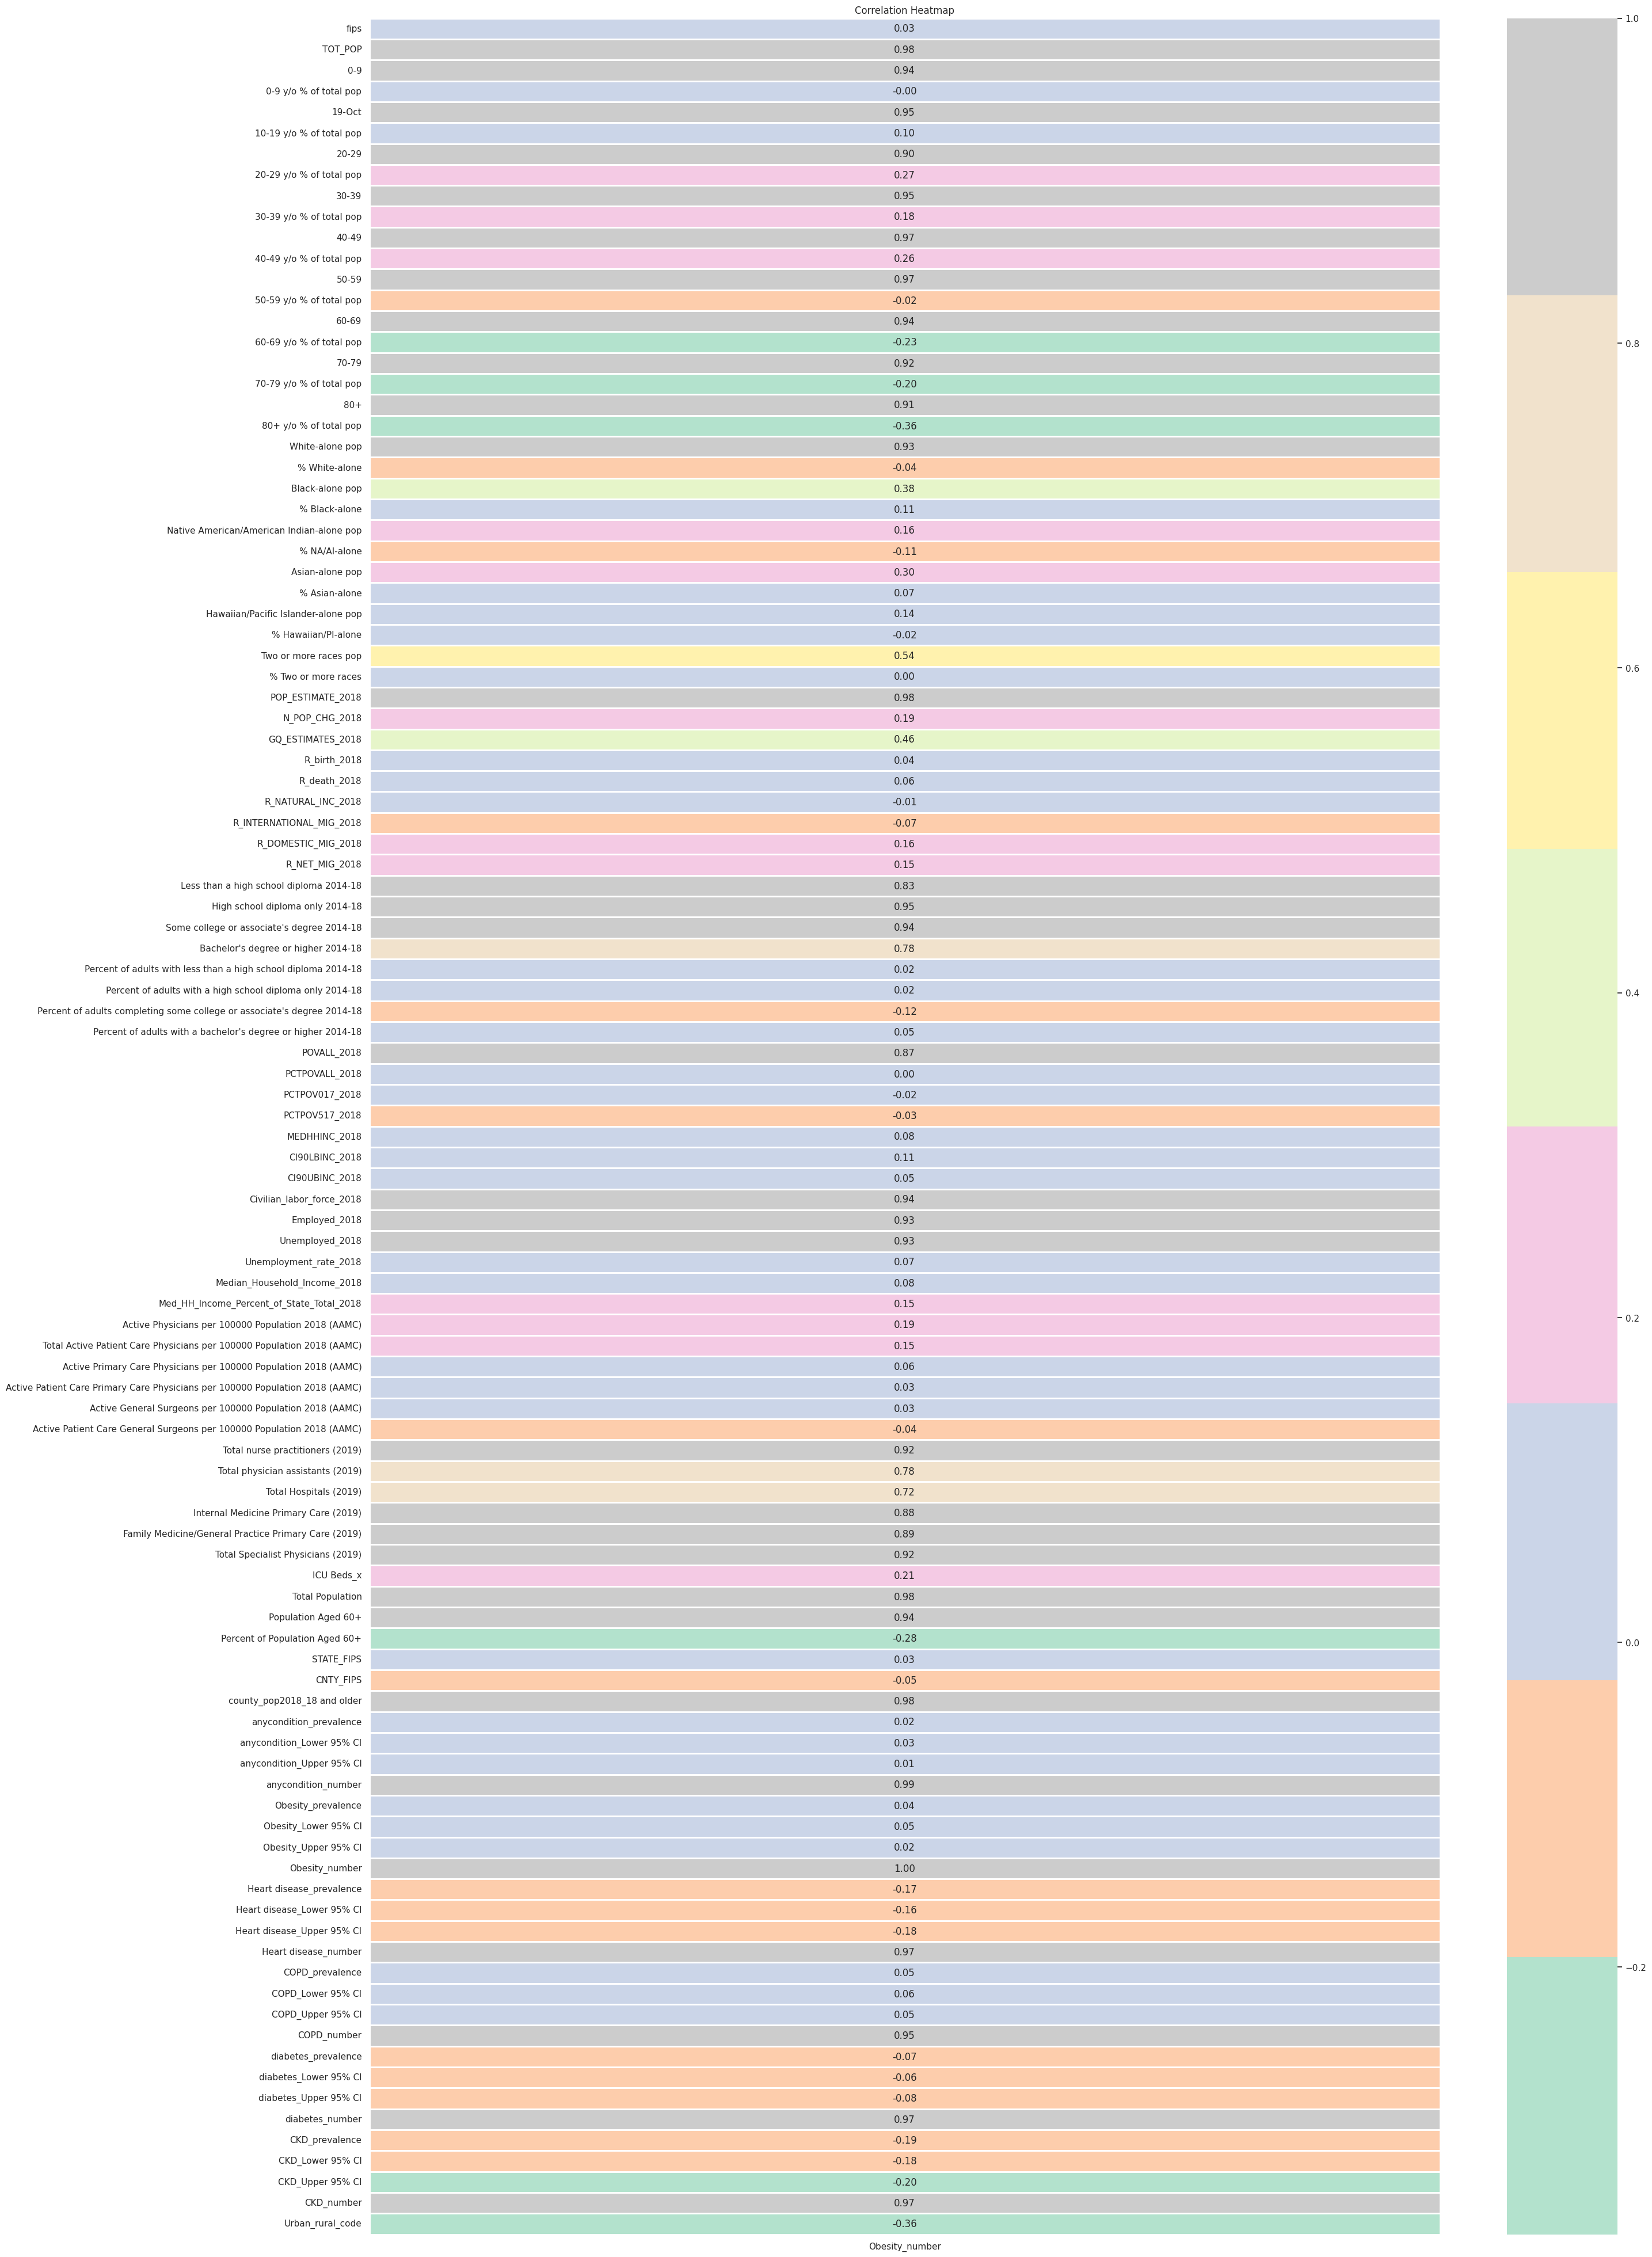

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

columna_seleccionada = 'Obesity_number'
correlacion_columna = total_data_scal.corr()[columna_seleccionada]
correlacion_columna = pd.DataFrame(correlacion_columna)
plt.figure(figsize=(30, 50)), 
 
sns.heatmap(correlacion_columna, annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
 
plt.title('Correlation Heatmap')
plt.show()

In [215]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sel, y_train)

LinearRegression()

In [216]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): 8.52628870451344e-05
Coefficients: [ 2.20492713e-01 -2.48657583e-02 -2.56202057e-02 -4.31559395e-02
 -2.61343667e-02 -2.68707280e-02 -2.59793433e-02 -2.67518767e-02
 -1.90136238e-02 -9.97317406e-03 -1.21711763e-15 -6.44375288e-15
 -3.43483282e-02  4.54868106e-16  1.27564540e-15  1.04662841e-15
  2.89046233e-17 -1.31838984e-16  9.74914593e-16 -2.53269627e-16
 -3.60822483e-16  1.82145965e-15  5.65519853e-16  6.16867668e-15
 -1.22367394e-14  8.78117024e-14 -1.85962357e-15  3.07393000e-15
  6.31439345e-16 -3.13638004e-15  3.75394160e-15  1.00000000e+00]


In [217]:
y_pred = model.predict(X_test_sel)
y_pred

array([ 1.28329769e-01,  4.84412470e-01,  2.48428284e-01,  2.13818135e-01,
        2.29891762e-01,  2.37021194e-01,  1.28005704e-01,  4.18043943e-02,
        8.81456997e-02,  6.34065720e-01,  9.54695703e-02,  2.27817746e-01,
        7.00110182e-01,  6.29982500e-01,  1.78624668e-01,  1.92753905e-01,
        3.07732193e-01,  4.05794283e-01,  3.20824422e-02,  1.93596474e-01,
        4.27506643e-01,  3.74684037e-01,  3.98600039e-02,  7.97848208e-02,
        1.14654223e-01,  7.60256660e-02,  4.66588891e-01,  1.65791691e-01,
        6.55972519e-01,  2.89908614e-01,  6.66990732e-01,  5.70613779e-01,
        3.06241493e-01,  1.61902910e-01,  7.92922419e-01,  6.44889494e-02,
        6.41648843e-02,  5.38596150e-02,  3.29638992e-01,  5.26670555e-01,
        1.57495625e-02,  3.79415387e-01,  1.52180958e-01,  3.36120293e-01,
        2.36502690e-01,  6.03279539e-01,  1.45505217e-01,  3.85896688e-01,
        5.54864217e-01,  9.71547087e-02,  1.96772312e-01,  5.85196707e-01,
        3.26139089e-01,  

In [218]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 2.3933928565295365e-31
Coeficiente de determinación: 1.0


Coeficientes Ridge: [-5.15709992e-04 -6.04424042e-03  7.31204558e-02  8.44586191e-02
  1.06348859e-02 -1.05468324e-01  6.41134089e-02 -2.44075530e-02
 -2.02739213e-01 -6.59255553e-03 -9.38771627e-03 -1.72182694e-01
 -5.15709992e-04  8.34822638e-02  1.05736122e-01 -2.52897788e-02
  5.05696121e-03  6.85615132e-03 -3.11394995e-02  1.64753630e-02
 -9.98869560e-02  5.15690362e-02  1.65996312e-01  7.87242815e-03
 -1.47782027e-02  8.95228539e-03  9.09198502e-01  6.33486298e-02
 -1.96624114e-01  1.27521551e-01  7.04593479e-02]
Coeficientes Lasso: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


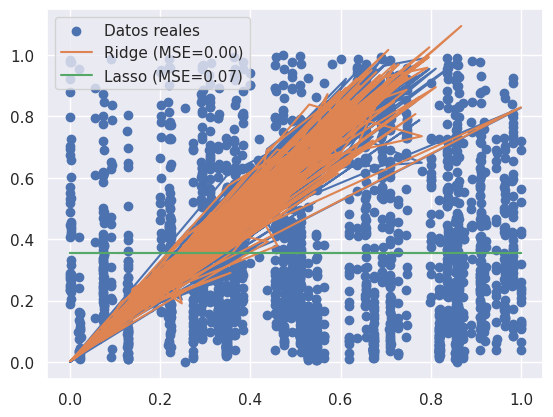

In [219]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

ridge_model = Ridge(alpha=0.1, max_iter=300)
lasso_model = Lasso(alpha=0.1, max_iter=300)

# Entrenar los modelos
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Realizar predicciones
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Calcular el error cuadrático medio
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

# Imprimir los coeficientes
print("Coeficientes Ridge:", ridge_model.coef_)
print("Coeficientes Lasso:", lasso_model.coef_)

# Graficar resultados
plt.scatter(X.iloc[:,0], y, label='Datos reales')
plt.plot(X_test_sel.iloc[ :,0], y_test.to_numpy().flatten())
plt.plot(X_test_sel.iloc[ :,0], ridge_predictions.flatten(), label=f'Ridge (MSE={ridge_mse:.2f})')
plt.plot(X_test_sel.iloc[ :,0], lasso_predictions.flatten(), label=f'Lasso (MSE={lasso_mse:.2f})')
plt.legend()
plt.show()


Ambos modelos son bastante precisos, pero en este caso elegimos el modelo de Rigde, ya que es el que mas se acerca a O